In [1]:
# Implementing an adaptive lineal neuron network in Python
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
[51.08122709777622, 3212.001733063833, 5006791.287179796, 7811818375.78158, 12188352557082.277, 1.9016819254863856e+16, 2.967090202540118e+19, 4.629388412448569e+22, 7.222981308409788e+25, 1.1269622320163618e+29]
[51.08122709777622, 48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111]


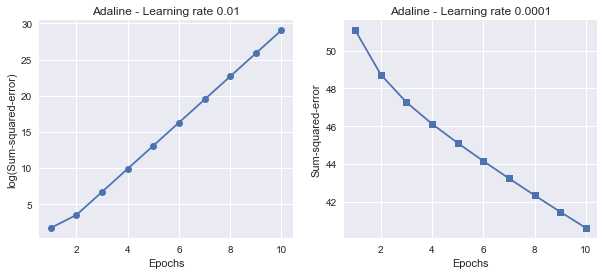

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from os import getcwd, chdir
import matplotlib as mpl

mpl.style.use('seaborn')

abs_path = pathlib.Path(getcwd()).joinpath('data-science').joinpath('Py_ML')
# chdir(abs_path)
df = pd.read_csv('iris.data', header= None)
df.tail()
print(df.tail())

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values
# print(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

print(ada1.cost_)

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='s')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')



print(ada2.cost_)
plt.show()




In [7]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.01):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # print(Z[300])
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        print(X[y == cl, 0])
        print(np.where(y == cl))
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    

[-0.5810659  -0.89430898 -1.20755205 -1.36417359 -0.73768744 -0.11120129
 -1.36417359 -0.73768744 -1.67741667 -0.89430898 -0.11120129 -1.05093052
 -1.05093052 -1.8340382   0.51528486  0.35866332 -0.11120129 -0.5810659
  0.35866332 -0.5810659  -0.11120129 -0.5810659  -1.36417359 -0.5810659
 -1.05093052 -0.73768744 -0.73768744 -0.42444437 -0.42444437 -1.20755205
 -1.05093052 -0.11120129 -0.42444437  0.04542025 -0.89430898 -0.73768744
  0.04542025 -0.89430898 -1.67741667 -0.5810659  -0.73768744 -1.52079513
 -1.67741667 -0.73768744 -0.5810659  -1.05093052 -0.5810659  -1.36417359
 -0.26782283 -0.73768744]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64),)
[ 2.39474331  1.45501408  2.23812177  0.04542025  1.61163562  0.35866332
  1.29839254 -0.89430898  1.76825716 -0.42444437 -0.73768744  0.6719064
  0

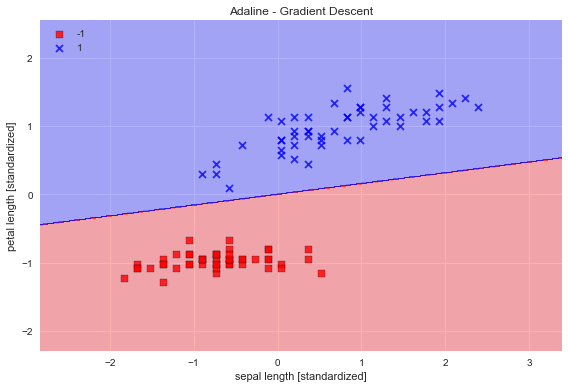

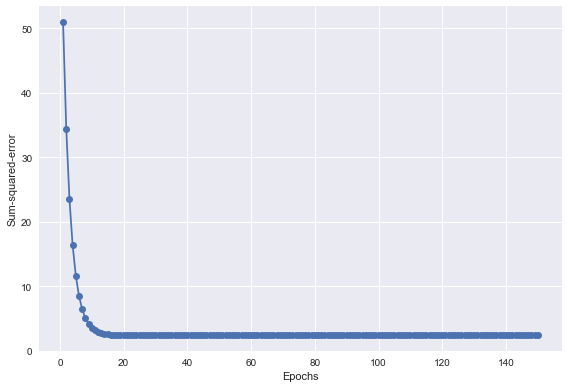

In [10]:
ada = AdalineGD(n_iter=150, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()







In [19]:
# Large scale machine learning and stochastic gradient descent
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        print('Initial weights: ', self.w_)
        self.w_initialized = True        
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def net_input(self, xi):
        return np.dot(xi, self.w_[1:]) + self.w_[0]
    
    def activation(self, net_x):
        return net_x
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        # print('error per xi: ', error, ' -- xi.dot(error): ', xi.dot(error))
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

Initial weights:  [ 0.01624345 -0.00611756 -0.00528172]
[-0.5810659  -0.89430898 -1.20755205 -1.36417359 -0.73768744 -0.11120129
 -1.36417359 -0.73768744 -1.67741667 -0.89430898 -0.11120129 -1.05093052
 -1.05093052 -1.8340382   0.51528486  0.35866332 -0.11120129 -0.5810659
  0.35866332 -0.5810659  -0.11120129 -0.5810659  -1.36417359 -0.5810659
 -1.05093052 -0.73768744 -0.73768744 -0.42444437 -0.42444437 -1.20755205
 -1.05093052 -0.11120129 -0.42444437  0.04542025 -0.89430898 -0.73768744
  0.04542025 -0.89430898 -1.67741667 -0.5810659  -0.73768744 -1.52079513
 -1.67741667 -0.73768744 -0.5810659  -1.05093052 -0.5810659  -1.36417359
 -0.26782283 -0.73768744]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64),)
[ 2.39474331  1.45501408  2.23812177  0.04542025  1.61163562  0.35866332
  1.29839254 -0.894

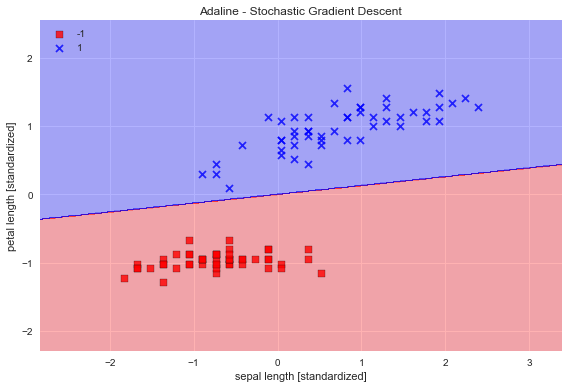

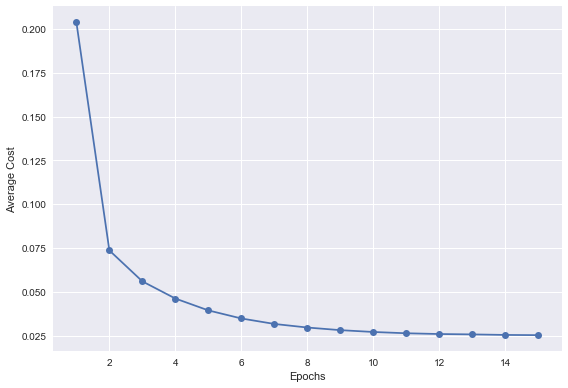

In [24]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()










[-0.5810659  -0.89430898 -1.20755205 -1.36417359 -0.73768744 -0.11120129
 -1.36417359 -0.73768744 -1.67741667 -0.89430898 -0.11120129 -1.05093052
 -1.05093052 -1.8340382   0.51528486  0.35866332 -0.11120129 -0.5810659
  0.35866332 -0.5810659  -0.11120129 -0.5810659  -1.36417359 -0.5810659
 -1.05093052 -0.73768744 -0.73768744 -0.42444437 -0.42444437 -1.20755205
 -1.05093052 -0.11120129 -0.42444437  0.04542025 -0.89430898 -0.73768744
  0.04542025 -0.89430898 -1.67741667 -0.5810659  -0.73768744 -1.52079513
 -1.67741667 -0.73768744 -0.5810659  -1.05093052 -0.5810659  -1.36417359
 -0.26782283 -0.73768744]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64),)
[ 2.39474331  1.45501408  2.23812177  0.04542025  1.61163562  0.35866332
  1.29839254 -0.89430898  1.76825716 -0.42444437 -0.73768744  0.6719064
  0

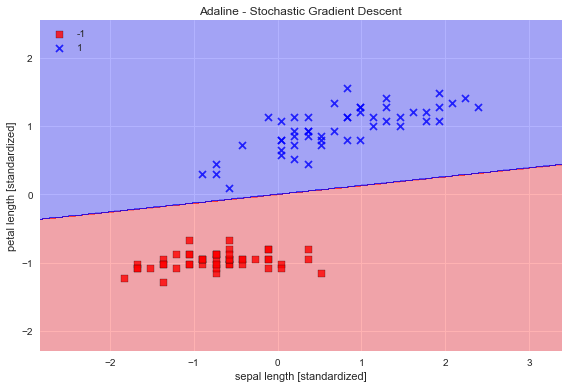

In [27]:
ada.partial_fit(X_std[0, :], y[0])

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

